# Date Time Processing

In [20]:
import numpy as np
import pandas as pd 
import seaborn as sns
from datetime import datetime

In [21]:
def parse_dt(dt_string):
    dt = datetime.strptime(dt_string, '%m/%d/%Y %H:%M')
    
    year = dt.year
    month = dt.month
    
    # {winter:1, spring:2, summer:3, fall:4}
    season = (month%12 + 3) // 3  
    
    return year, month, season

In [22]:
parse_dt('2/17/1980 18:00')

(1980, 2, 1)

In [23]:
data = pd.read_csv('HURdat_ExtremeWeatherEvents.csv')
data['year'], data['month'], data['season'] = zip(*data.date_time.map(parse_dt))

---

In [28]:
data.head()

,Unnamed: 0,ID,Name,Status,Latitude,Longitude,Maximum.Wind,date_time,diff,rapid_int,...,speed,speed_z,speed_m,Jday,Maximum.Wind_p,Latitude_p,Longitude_p,year,month,season
0,1,AL011980,UNNAMED,TD,30.5,-76.5,20,7/17/1980 0:00,NaN,NaN,...,NaN,NaN,NaN,55,NaN,NaN,NaN,1980,7,3
1,2,AL011980,UNNAMED,TD,30.2,-77.2,25,7/17/1980 6:00,NaN,NaN,...,NaN,NaN,NaN,55,20.0,30.5,-76.5,1980,7,3
2,3,AL011980,UNNAMED,TD,30.0,-78.0,25,7/17/1980 12:00,NaN,NaN,...,NaN,NaN,NaN,55,25.0,30.2,-77.2,1980,7,3
3,4,AL011980,UNNAMED,TD,29.9,-79.3,25,7/17/1980 18:00,NaN,NaN,...,12.869511,0.035365,9.266244,55,25.0,30.0,-78.0,1980,7,3
4,5,AL011980,UNNAMED,TD,29.8,-80.2,25,7/18/1980 0:00,5.0,0.0,...,17.071172,0.035158,9.266244,54,25.0,29.9,-79.3,1980,7,3


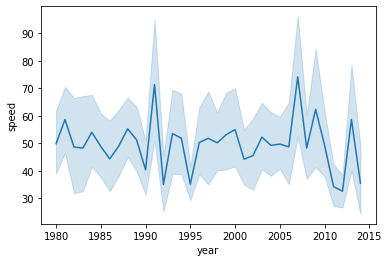

In [7]:
sns.lineplot('year', 'speed', data=data)

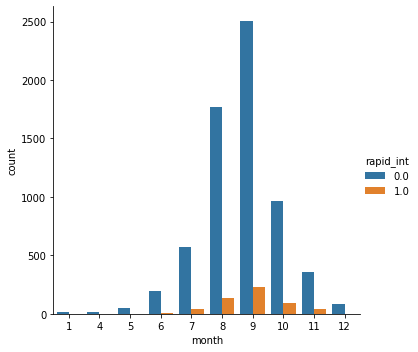

In [8]:
sns.catplot('month', data=data, kind='count', hue='rapid_int', )

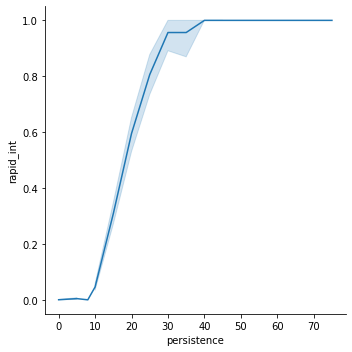

In [9]:
sns.relplot('persistence', 'rapid_int', data=data, kind='line')

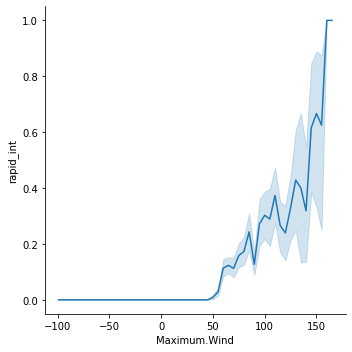

In [10]:
sns.relplot('Maximum.Wind', 'rapid_int', data=data, kind='line')